<a href="https://colab.research.google.com/github/arhamarhamarham/Loan-approval-Prediction/blob/main/Muhammad_Arham_Logistic_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing all the necessary libraries.**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

**Exploratory Data Analysis**

In [2]:
def check_data(df,n):
    return print(f"shape of dataframe is {df.shape}  ,\n\n\nTop {n} entries are \n {df.head(n)} ,\n\n\nBottom {n} entries are \n{df.tail(n)} \n\n\nType of data columns is \n {df.dtypes}\n\n\n\n overview of dataset \n{df.describe()}")

In [3]:
Data = pd.read_csv('/content/Muhammad Arham - project1_dataset - Muhammad Arham - project1_dataset.csv')

In [ ]:
check_data(Data, 5)

shape of dataframe is (32581, 12)  ,


Top 5 entries are 
    person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.

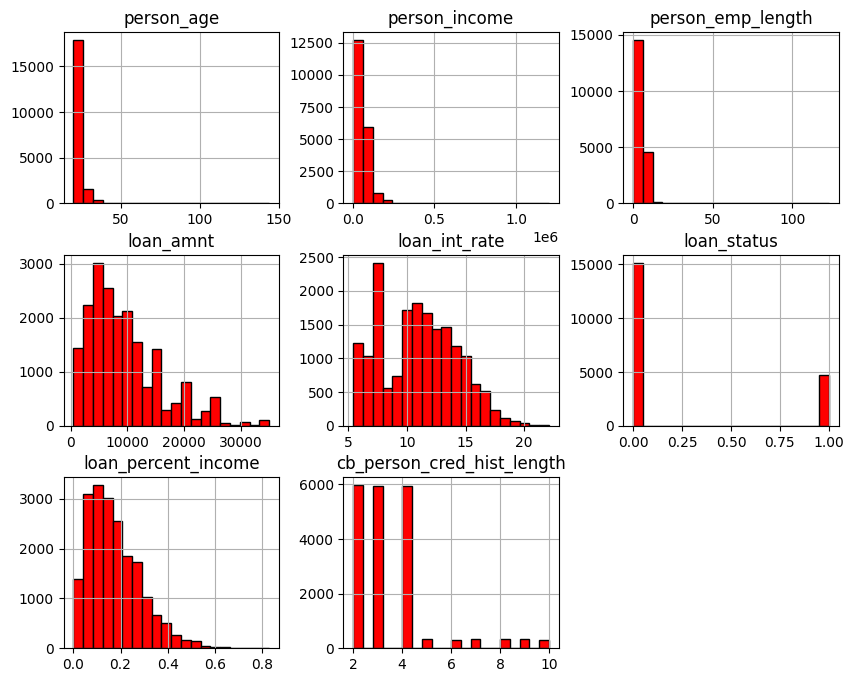

In [4]:
Data.hist(figsize=(10,8), bins=20, color='red', edgecolor='black')
plt.title(f'Histogram of {Data}')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [16]:
Data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

Dropping missing values in loan interest rates column and person employment length column.

In [6]:
Data = Data.dropna(subset = ['person_emp_length'])

In [7]:
Data = Data.dropna(subset = ['loan_int_rate'])

In [19]:
Data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [20]:
Data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [21]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_status                 28638 non-null  int64  
 9   loan_percent_income         28638 non-null  float64
 10  cb_person_default_on_file   28638 non-null  object 
 11  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


Detecting and removing outliers from columns.

In [5]:
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    df_no_outliers = df[(df[column_name] >= lower_limit) & (df[column_name] <= upper_limit)]

    return df_no_outliers


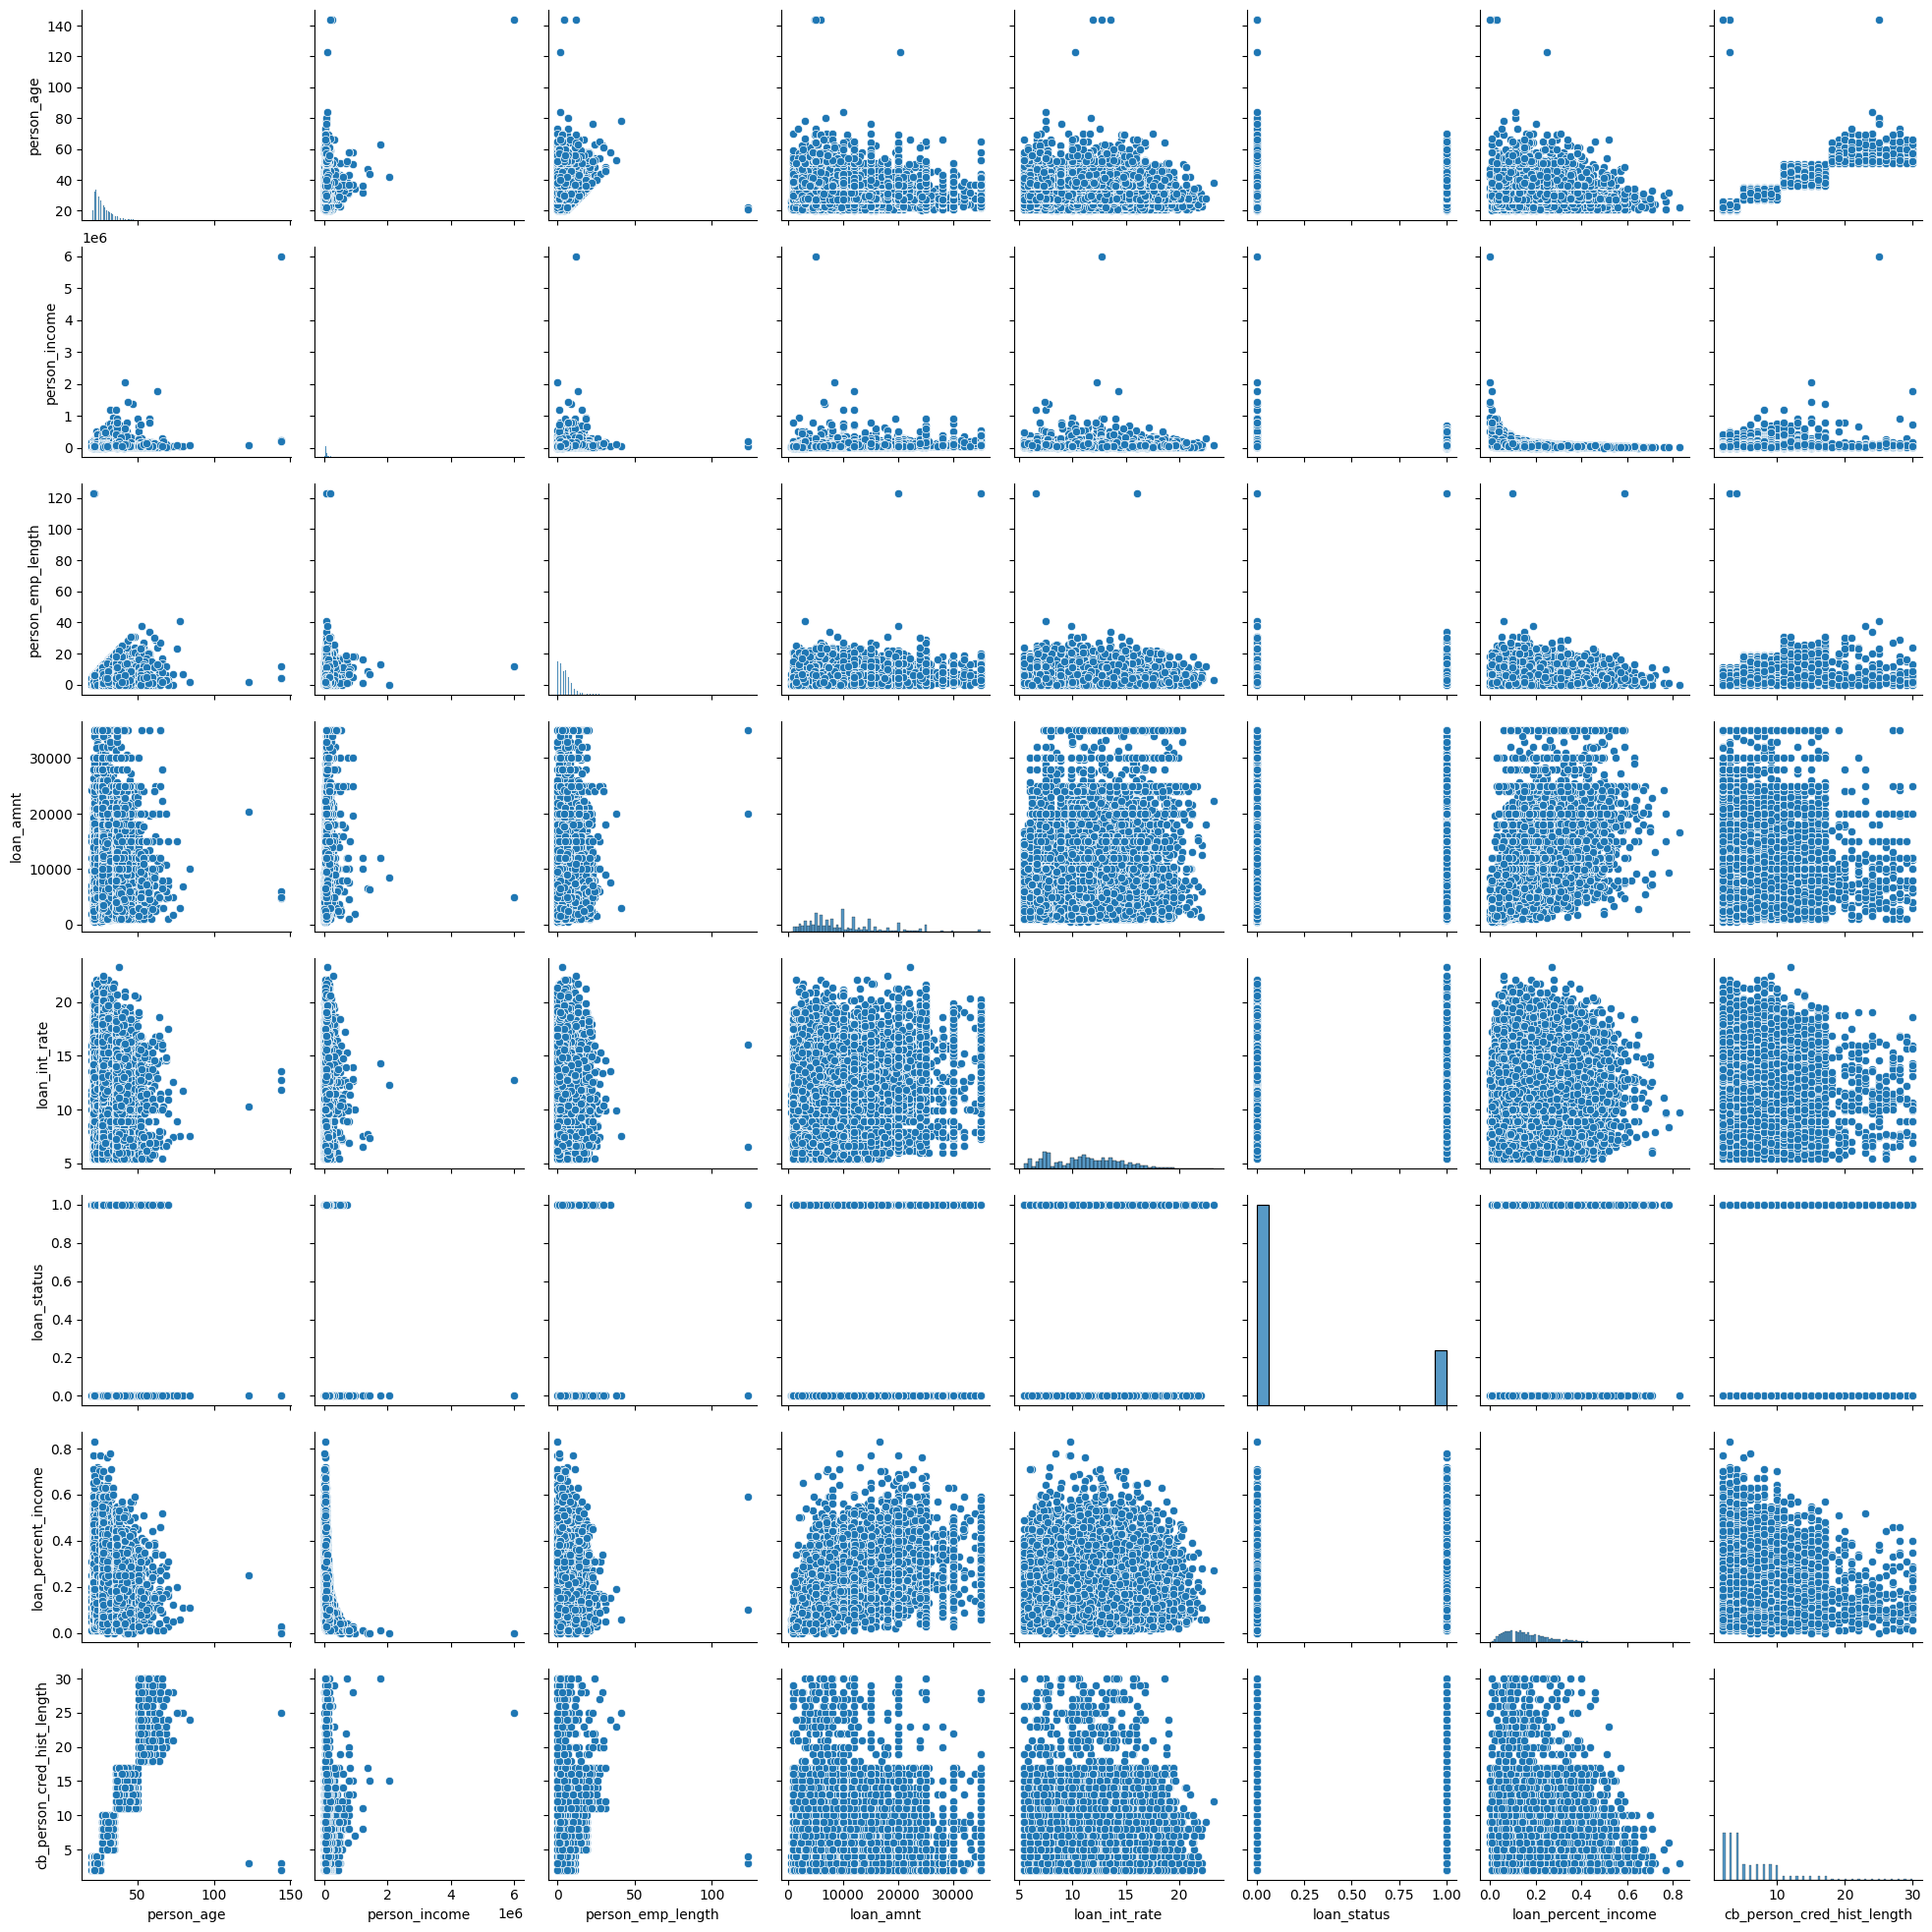

In [ ]:
sns.pairplot(Data)

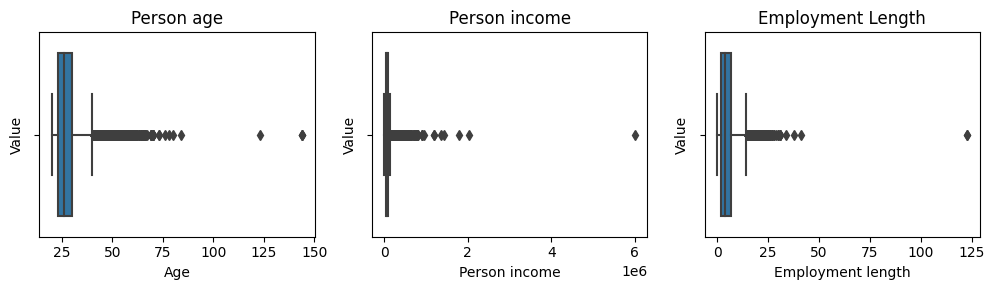

In [23]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

sns.boxplot(x='person_age', data=Data, ax=axes[0])
sns.boxplot(x='person_income', data=Data, ax=axes[1])
sns.boxplot(x='person_emp_length', data=Data, ax=axes[2])

axes[0].set_title("Person age")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Value")

axes[1].set_title("Person income")
axes[1].set_xlabel("Person income")
axes[1].set_ylabel("Value")

axes[2].set_title("Employment Length")
axes[2].set_xlabel("Employment length")
axes[2].set_ylabel("Value")

plt.tight_layout()
plt.show()

In [8]:
Data2 = remove_outliers(Data, 'person_age')

In [9]:
Data2 = remove_outliers(Data2, 'person_income')

In [10]:
Data2 = remove_outliers(Data2, 'person_emp_length')

In [27]:
Data2

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
...,...,...,...,...,...,...,...,...,...,...,...,...
32276,38,40000,MORTGAGE,5.0,PERSONAL,A,10000,5.99,0,0.25,N,17
32287,36,44000,RENT,4.0,DEBTCONSOLIDATION,D,8000,17.49,1,0.18,N,15
32290,37,90000,MORTGAGE,11.0,DEBTCONSOLIDATION,A,4000,6.62,0,0.04,N,15
32293,38,110000,MORTGAGE,5.0,MEDICAL,B,16000,11.99,0,0.15,N,13


Boxplots after removing outliers from columns 'person_age', 'person_income' and 'person_emp_length' :

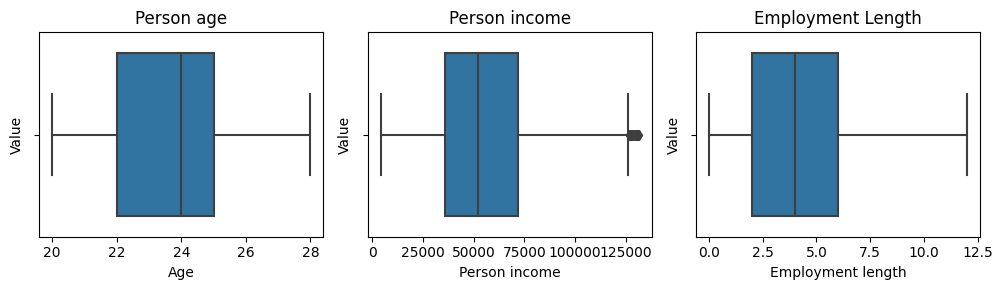

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# Creating box plots for each column with outliers
sns.boxplot(x='person_age', data=Data2, ax=axes[0])
sns.boxplot(x='person_income', data=Data2, ax=axes[1])
sns.boxplot(x='person_emp_length', data=Data2, ax=axes[2])

axes[0].set_title("Person age")
axes[0].set_xlabel("Age")
axes[0].set_ylabel("Value")

axes[1].set_title("Person income")
axes[1].set_xlabel("Person income")
axes[1].set_ylabel("Value")

axes[2].set_title("Employment Length")
axes[2].set_xlabel("Employment length")
axes[2].set_ylabel("Value")

plt.tight_layout()
plt.show()

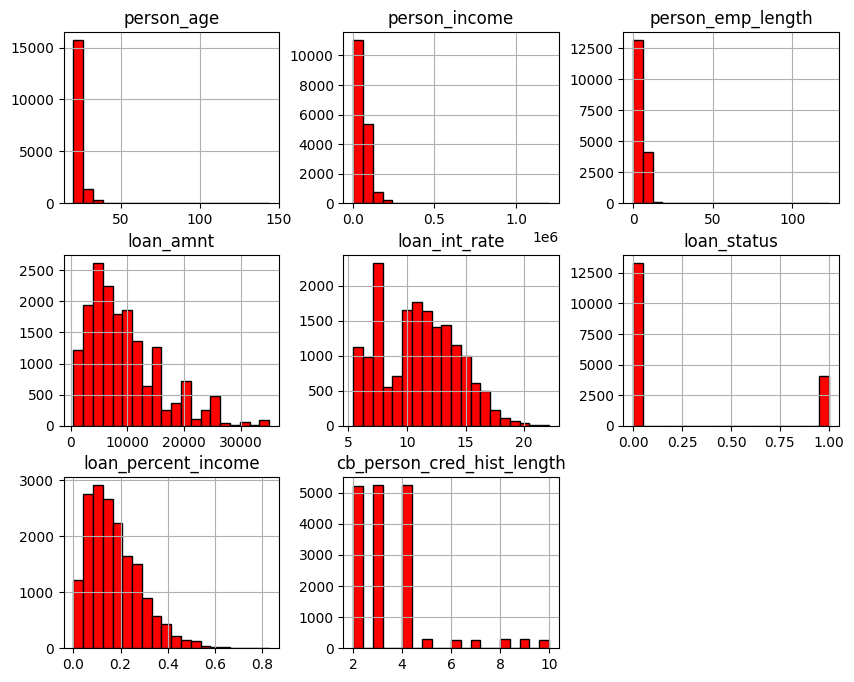

In [12]:
Data.hist(figsize=(10,8), bins=20, color='red', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [29]:
Data2.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,25557.000000,25557.000000,25557.000000,25557.000000,25557.000000,25557.000000,25557.000000,25557.000000
mean,26.558164,58798.081817,4.375318,9316.644168,11.035141,0.223579,0.174063,5.166217
std,4.386366,27289.920534,3.386280,6026.915379,3.218731,0.416651,0.106643,3.237229
min,20.000000,4080.000000,0.000000,500.000000,5.420000,0.000000,0.010000,2.000000
25%,23.000000,38000.000000,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,25.000000,54000.000000,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,29.000000,75000.000000,7.000000,12000.000000,13.480000,0.000000,0.230000,7.000000
max,40.000000,140900.000000,14.000000,35000.000000,23.220000,1.000000,0.830000,17.000000


In [ ]:
Data2.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

**DATA PREPROCESSING:**

Ordinal Encoding : loan_grade

One-Hot Encoding : cb_person_default_on_file, loan_intent, person_home_ownership

In [31]:
Data2 = pd.get_dummies(Data2, columns=["person_home_ownership", "loan_intent", "cb_person_default_on_file"])

In [39]:
ordinal_variable_df = Data2['loan_grade']
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
Data2['loan_grade_encoded']=ordinal_variable_df.apply(lambda x: grade_order.index(x))

In [41]:
Data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25557 entries, 1 to 32296
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      25557 non-null  int64  
 1   person_income                   25557 non-null  int64  
 2   person_emp_length               25557 non-null  float64
 3   loan_grade                      25557 non-null  object 
 4   loan_amnt                       25557 non-null  int64  
 5   loan_int_rate                   25557 non-null  float64
 6   loan_status                     25557 non-null  int64  
 7   loan_percent_income             25557 non-null  float64
 8   cb_person_cred_hist_length      25557 non-null  int64  
 9   person_home_ownership_MORTGAGE  25557 non-null  uint8  
 10  person_home_ownership_OTHER     25557 non-null  uint8  
 11  person_home_ownership_OWN       25557 non-null  uint8  
 12  person_home_ownership_RENT      

In [42]:
# Dropping the loan_grade column because the dataframe now includes the encoded version of the column
Data2 = Data2.drop(['loan_grade'], axis = 1)

In [43]:
Data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25557 entries, 1 to 32296
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      25557 non-null  int64  
 1   person_income                   25557 non-null  int64  
 2   person_emp_length               25557 non-null  float64
 3   loan_amnt                       25557 non-null  int64  
 4   loan_int_rate                   25557 non-null  float64
 5   loan_status                     25557 non-null  int64  
 6   loan_percent_income             25557 non-null  float64
 7   cb_person_cred_hist_length      25557 non-null  int64  
 8   person_home_ownership_MORTGAGE  25557 non-null  uint8  
 9   person_home_ownership_OTHER     25557 non-null  uint8  
 10  person_home_ownership_OWN       25557 non-null  uint8  
 11  person_home_ownership_RENT      25557 non-null  uint8  
 12  loan_intent_DEBTCONSOLIDATION   

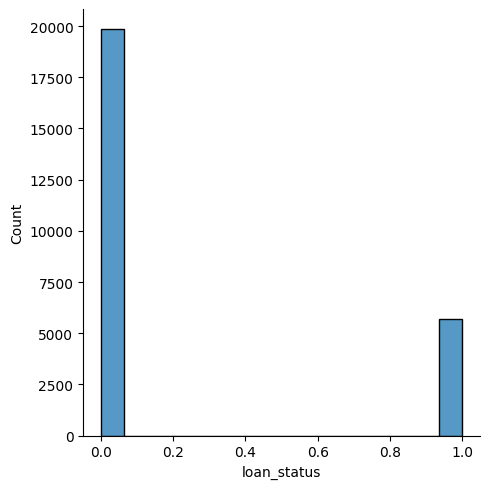

In [44]:
sns.displot(Data2['loan_status'])

Because of the class imbalance in target variable 'loan_status', i'm using stratified splitting

**TEST TRAIN SPLIT**

In [263]:
from sklearn.model_selection import train_test_split

y = Data2['loan_status'].values
X = Data2.drop(columns = ['loan_status'])

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=1)


Using undersampling to reduce the class imbalance in target variable

In [264]:
from imblearn.under_sampling import RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='majority', random_state=1)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

<Axes: ylabel='Frequency'>

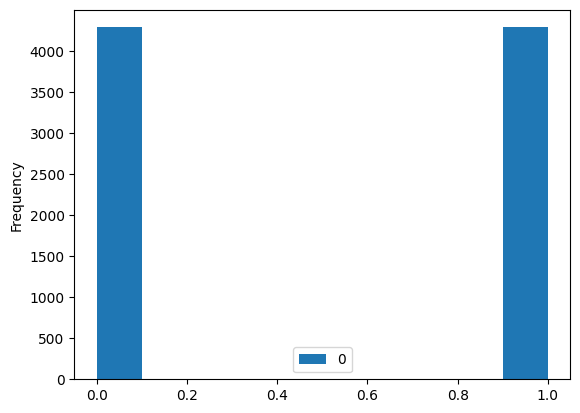

In [265]:
ytraindf = pd.DataFrame(y_train_resampled)
ytraindf.plot(kind='hist')

In [266]:
ytraindf.count()

0    8570
dtype: int64

**Univariate Feature Selection (Statistical Tests):**

**ANOVA F-Statistic**

In [267]:
from sklearn.feature_selection import SelectKBest, f_classif
# Create a feature selector using ANOVA F-statistic
selector = SelectKBest(score_func=f_classif, k=15)

# Fit it to your training data
X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)


In [268]:
# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

In [269]:
selected_feature_indices

array([ 1,  2,  3,  4,  5,  7,  9, 10, 11, 12, 14, 16, 17, 18, 19])

In [270]:
# Transform the test data using the same selection
X_test_selected = selector.transform(X_test)

In [258]:
xtrsdf = pd.DataFrame(X_train_selected)

In [ ]:
xtrsdf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,51000.0,1.000000,5000.0,8.000000,0.100000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,34800.0,2.000000,5000.0,16.020000,0.140000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
2,45000.0,3.000000,7000.0,13.430000,0.160000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
3,73000.0,6.000000,12500.0,6.000000,0.170000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0
4,95000.0,0.000000,14000.0,12.690000,0.150000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29859,41000.0,6.283496,3426.0,11.558250,0.085670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
29860,32903.0,3.892339,4810.0,13.304286,0.150000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
29861,14000.0,4.796226,3089.0,8.725330,0.217962,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29862,73218.0,2.562963,14531.0,14.204260,0.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
X_test_selected

array([[3.000e+04, 1.100e+01, 1.100e+04, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [2.912e+04, 0.000e+00, 5.000e+03, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [5.100e+04, 1.000e+00, 6.000e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [6.000e+04, 1.300e+01, 1.700e+04, ..., 0.000e+00, 1.000e+00,
        3.000e+00],
       [1.250e+05, 4.000e+00, 1.000e+04, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [7.500e+04, 5.000e+00, 1.200e+04, ..., 1.000e+00, 1.000e+00,
        0.000e+00]])

**Feature Scaling**

In [271]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

**Training the Model**

In [272]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train_resampled)

LogisticRegression()

In [273]:
predictions = model.predict(X_test_scaled)

**MODEL EVALUATION**

In [277]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.79


In [278]:
report = classification_report(y_test, predictions)
print(f'Classification Report:\n{report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.79      0.85      4961
           1       0.52      0.79      0.63      1429

    accuracy                           0.79      6390
   macro avg       0.72      0.79      0.74      6390
weighted avg       0.84      0.79      0.80      6390



In [279]:
cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  1123
False Positive(FP) =  1037
True Negative(TN)  =  3924
False Negative(FN) =  306


In [280]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy of the binary classifier = 0.790


Interpretation:

Precision for Class 0 (Rejected Loans): 93% of the predicted rejected loans are correct.

Recall for Class 0 (Rejected Loans): The model correctly identifies 79% of all actual rejected loans.

Precision for Class 1 (Approved Loans): 52% of the predicted approved loans are correct.

Recall for Class 1 (Approved Loans): The model correctly identifies 79% of all actual approved loans.

F1-Score: The F1-scores for both classes are provided. The F1-score is the harmonic mean of precision and recall. For class 0, it's 0.85, and for class 1, it's 0.62.

Accuracy: The overall accuracy of the model is 0.79, indicating that it correctly predicts the loan status for 79% of the samples.

 **Feature Selection using RandomForestClassifier to see if accuracy scores improve**


In [49]:
X_train_resampled.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION',
       'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL',
       'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y',
       'loan_grade_encoded'],
      dtype='object')

In [281]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1)

# Train the classifier on your training data
rf_classifier.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=1)

In [282]:
# Get feature importances from the trained Random Forest classifier
feature_importances = rf_classifier.feature_importances_

In [283]:
feature_importances

array([0.04855434, 0.1487334 , 0.05514078, 0.08153208, 0.13725515,
       0.20304595, 0.03889024, 0.02262462, 0.00091127, 0.01681792,
       0.04154612, 0.01201933, 0.01260446, 0.0147718 , 0.01269771,
       0.00914094, 0.01265627, 0.00927347, 0.01003247, 0.11175169])

In [284]:
# Creating a dictionary to map feature names to their importances
feature_names = X_train_resampled.columns

feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sorting features by their importance in descending order
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

k = 20  # Selecting 15 best features
selected_features_rf = [feature for feature, importance in sorted_features[:k]]

In [285]:
selected_features_rf

['loan_percent_income',
 'person_income',
 'loan_int_rate',
 'loan_grade_encoded',
 'loan_amnt',
 'person_emp_length',
 'person_age',
 'person_home_ownership_RENT',
 'cb_person_cred_hist_length',
 'person_home_ownership_MORTGAGE',
 'person_home_ownership_OWN',
 'loan_intent_HOMEIMPROVEMENT',
 'loan_intent_MEDICAL',
 'loan_intent_VENTURE',
 'loan_intent_EDUCATION',
 'loan_intent_DEBTCONSOLIDATION',
 'cb_person_default_on_file_Y',
 'cb_person_default_on_file_N',
 'loan_intent_PERSONAL',
 'person_home_ownership_OTHER']

In [286]:
X_train_selected_rf = X_train_resampled[selected_features_rf]
X_test_selected_rf = X_test[selected_features_rf]

In [287]:
import numpy as np

# Filtering the training and test datasets to include only the selected features
selected_feature_indices_rf = [feature_names.get_loc(feature) for feature in selected_features_rf]

In [288]:
selected_feature_indices_rf

[5, 1, 4, 19, 3, 2, 0, 10, 6, 7, 9, 13, 14, 16, 12, 11, 18, 17, 15, 8]

In [289]:
# Training the model using the selected features
model_rf = RandomForestClassifier(n_estimators=100, random_state=0)
model_rf.fit(X_train_selected_rf, y_train_resampled)

y_pred_selected = model_rf.predict(X_test_selected_rf)

In [290]:
#MODEL EVALUATION
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#CLASSIFICATION REPORT:
accuracy = accuracy_score(y_test, y_pred_selected)
print(f'Accuracy: {accuracy:.2f}')
report = classification_report(y_test, y_pred_selected)
print(f'Classification Report:\n{report}')

Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      4961
           1       0.74      0.80      0.77      1429

    accuracy                           0.89      6390
   macro avg       0.84      0.86      0.85      6390
weighted avg       0.90      0.89      0.89      6390



In [291]:
#CONFUSION MATRIX:
cm = confusion_matrix(y_test, y_pred_selected)

TN, FP, FN, TP = confusion_matrix(y_test, y_pred_selected).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  1143
False Positive(FP) =  406
True Negative(TN)  =  4555
False Negative(FN) =  286


In [234]:
selected_features_rf

['loan_percent_income',
 'person_income',
 'loan_int_rate',
 'loan_grade_encoded',
 'loan_amnt',
 'person_emp_length',
 'person_age',
 'cb_person_cred_hist_length',
 'person_home_ownership_RENT',
 'person_home_ownership_MORTGAGE',
 'person_home_ownership_OWN',
 'loan_intent_HOMEIMPROVEMENT',
 'loan_intent_MEDICAL',
 'loan_intent_VENTURE',
 'loan_intent_DEBTCONSOLIDATION',
 'loan_intent_EDUCATION',
 'cb_person_default_on_file_Y',
 'loan_intent_PERSONAL',
 'cb_person_default_on_file_N',
 'person_home_ownership_OTHER']

In [292]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled_rf = scaler.fit_transform(X_train_selected_rf)
X_test_scaled_rf = scaler.transform(X_test_selected_rf)

*Predictions using features selected by RandomForestClassifier*

In [293]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train_scaled_rf, y_train_resampled)
predictions_rf = model.predict(X_test_scaled_rf)

In [294]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
accuracy = accuracy_score(y_test, predictions_rf)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.79


In [295]:
report = classification_report(y_test, predictions_rf)
print(f'Classification Report:\n{report}')

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.79      0.86      4961
           1       0.52      0.79      0.63      1429

    accuracy                           0.79      6390
   macro avg       0.73      0.79      0.74      6390
weighted avg       0.84      0.79      0.80      6390



It could be seen that there's no difference in accuracy scores and the classification report metrics for the model using any of the two feature selection methods.